### Baseline Flow
1. Import packages
2. Import Data
3. Check Data 
4. Check Target Feature
5. Partition Data into Y and X (Choose Features)
6. Validation Data - Train Test Split
7. Preprocessing (as many steps)
8. Model
9. Make Predictions
10. Evalute metrics
11. Export Predictions

# **1/ Import Packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


# 2/ Import Data


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

# 3/ Check Data

1. 5 rows
2. Check names with data type
3. Descriptive Stats
4. Target Feature

In [3]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


# 4/ Check Target Feature

<Axes: ylabel='Frequency'>

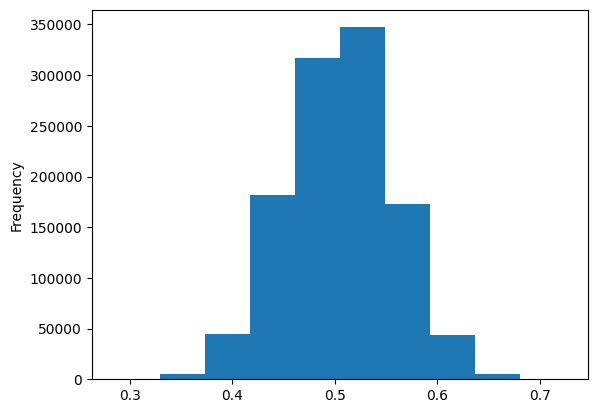

In [6]:
train['FloodProbability'].plot.hist()

In [7]:
train['FloodProbability'].describe()

count    1.117957e+06
mean     5.044803e-01
std      5.102610e-02
min      2.850000e-01
25%      4.700000e-01
50%      5.050000e-01
75%      5.400000e-01
max      7.250000e-01
Name: FloodProbability, dtype: float64

# 5/ Partition into y and X

In [8]:
selected_features = ['Deforestation','Siltation']

In [9]:
#train
y = train['FloodProbability']
X = train[selected_features]

In [10]:
#test
X_test = test[selected_features]

# 6/ Validation - TTS

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(894365, 2)
(223592, 2)
(894365,)
(223592,)


# 7/ Preprocessing

* Numerical
* Categorical


## Numerical Transformation
* Convert all to StandardScaler


In [13]:
# 1 - Import Package
# from sklearn.preprocessing import StandardScaler

# 2 - Create an Instance
num_scaler = StandardScaler()

# 3 - Fit an Instance
num_scaler.fit(X_train)

# 4 - Transform
X_train = num_scaler.transform(X_train)
X_val = num_scaler.transform(X_val)
X_test = num_scaler.transform(X_test)

# 8/ Model Building

In [14]:
# 1 - Import Package
from sklearn.linear_model import LinearRegression

# 2 - Create an Instance
model = LinearRegression()

# 3 - Fit an Instance
model.fit(X_train, y_train)

# 4 - Predict/Check
print(model.coef_)
print(model.intercept_)

[0.00946529 0.00966157]
0.5044801786742549


# 9/ Predict

In [15]:
y_train_prediction = model.predict(X_train)
y_val_prediction = model.predict(X_val)
y_test_prediction = model.predict(X_test)

# 10/ Evaluation Metrics
* Rsquared
* RMSE
* MSE

In [16]:
from sklearn.metrics import mean_squared_error

print('train metrics')
print('MSE :', mean_squared_error(y_train, y_train_prediction))
print('RMSE :',mean_squared_error(y_train, y_train_prediction, squared = False))

print('val metrics')
print('MSE :',mean_squared_error(y_val, y_val_prediction))
print('RMSE :',mean_squared_error(y_val, y_val_prediction, squared = False))

train metrics
MSE : 0.0024238600999434766
RMSE : 0.0492327137170345
val metrics
MSE : 0.002417459921773398
RMSE : 0.04916767151059116
